In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [78]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [79]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()

Dataset Shape: (1025, 14)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


<Figure size 1000x500 with 0 Axes>

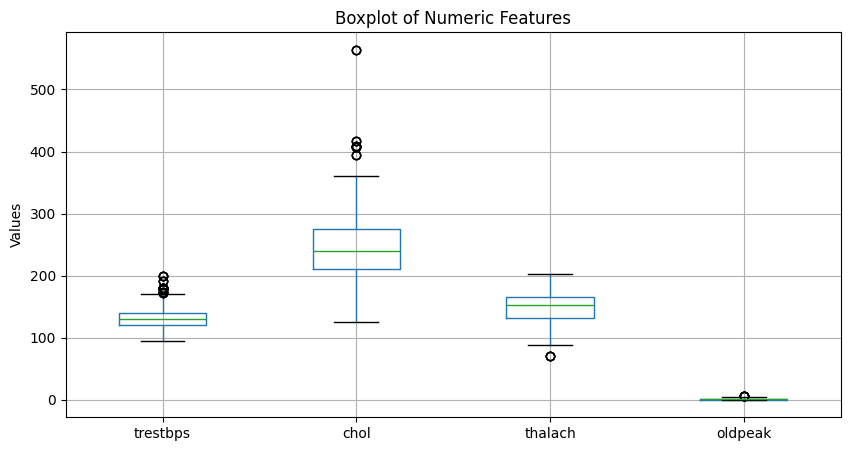

In [80]:
col_num = ['trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
plt.figure(figsize=(10, 5))
df[col_num].boxplot()
plt.title("Boxplot of Numeric Features")
plt.ylabel("Values")
plt.show()


<Figure size 1000x500 with 0 Axes>

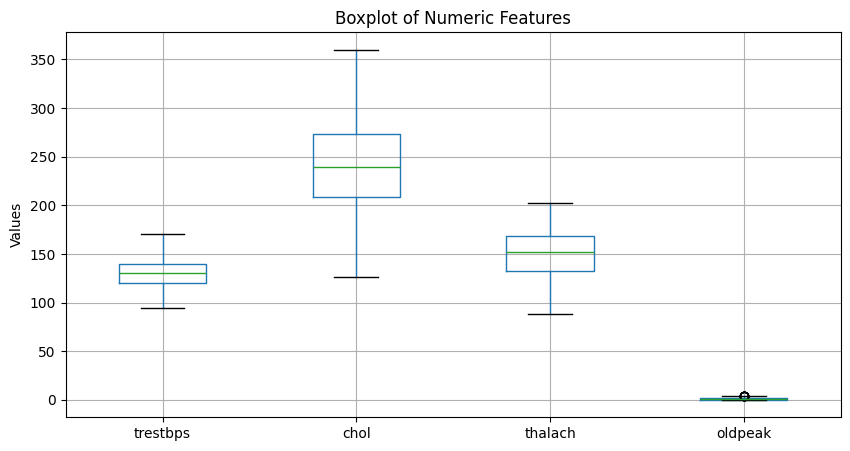

In [81]:
from scipy import stats

col_num = ['trestbps', 'chol', 'thalach', 'oldpeak']

df_filtered = df.copy()

for col in col_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]


df_filtered.head()


plt.figure(figsize=(10,5))
plt.figure(figsize=(10, 5))
df_filtered[col_num].boxplot()
plt.title("Boxplot of Numeric Features")
plt.ylabel("Values")
plt.show()


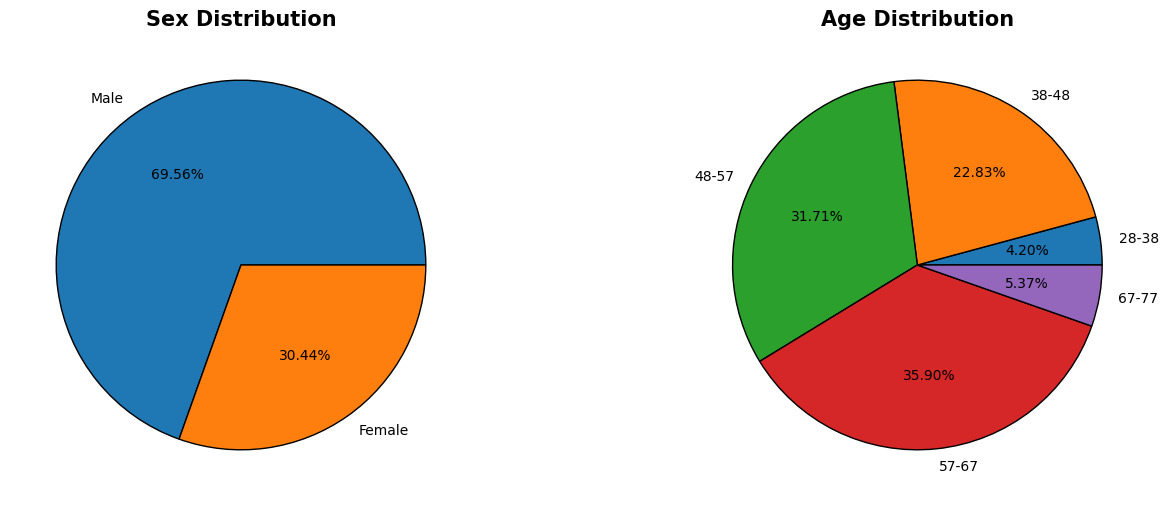

In [82]:
age_bins = pd.cut(df["age"], bins=5) 

age_counts = age_bins.value_counts().sort_index()

age_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in age_counts.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

sex_labels = ["Male", "Female"]
axes[0].pie(pd.value_counts(df["sex"]), 
            labels=sex_labels, 
            autopct='%.2f%%',  
            wedgeprops={'edgecolor': 'black'}) 
axes[0].set_title('Sex Distribution', fontsize=15, fontweight='bold')

axes[1].pie(age_counts, 
            labels=age_labels, 
            autopct='%.2f%%',           
            wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Age Distribution', fontsize=15, fontweight='bold')

plt.show()


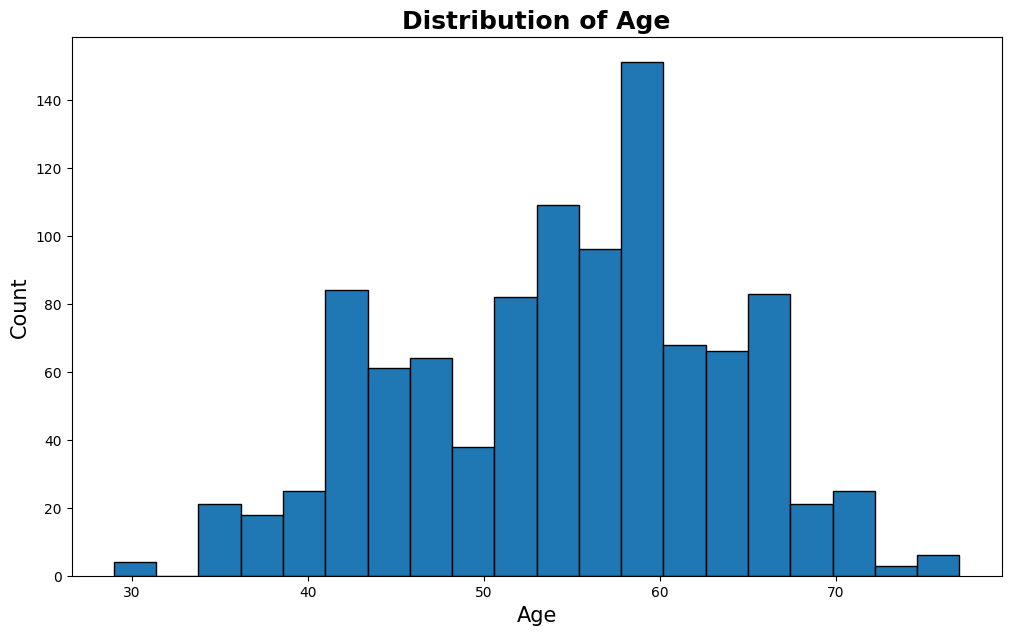

In [83]:
plt.figure(figsize=(12, 7))
n, bins, patches = plt.hist(df["age"], bins=20, edgecolor="black")

plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of Age", fontsize=18, fontweight="bold")

plt.show()


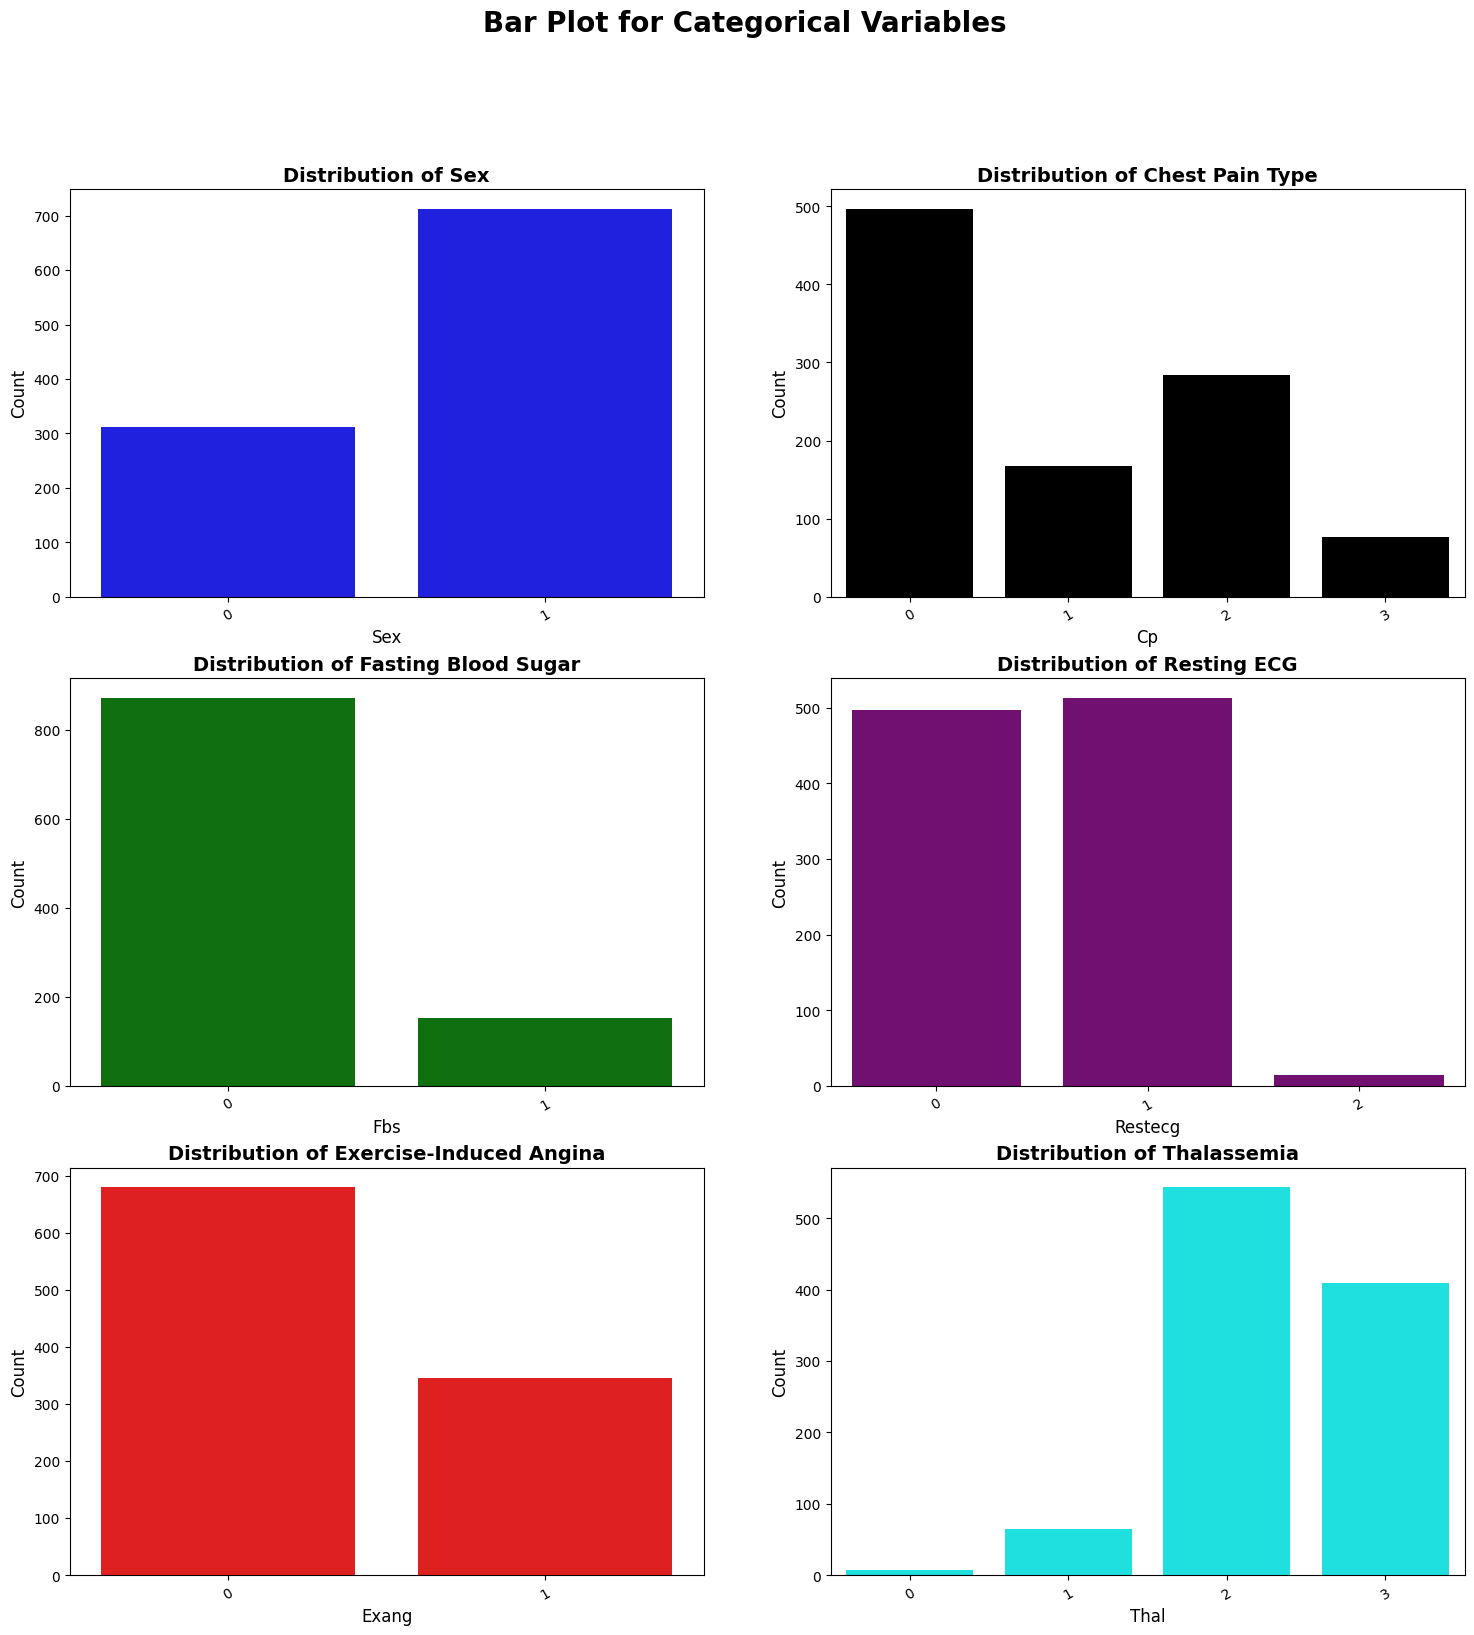

In [84]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

fig.suptitle('Bar Plot for Categorical Variables', fontsize=20, fontweight='bold')

categories = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']
titles = [
    'Distribution of Sex', 'Distribution of Chest Pain Type',
    'Distribution of Fasting Blood Sugar', 'Distribution of Resting ECG',
    'Distribution of Exercise-Induced Angina', 'Distribution of Thalassemia'
]
colors = ['blue', 'black', 'green', 'purple', 'red', 'cyan']

for i, ax in enumerate(axes.flat):  
    sns.countplot(ax=ax, x=categories[i], data=df, color=colors[i])
    ax.set_title(titles[i], fontsize=14, fontweight='bold')  
    ax.set_xlabel(categories[i].capitalize(), fontsize=12)  
    ax.set_ylabel('Count', fontsize=12)  
    ax.tick_params(axis='x', rotation=30) 

plt.show()


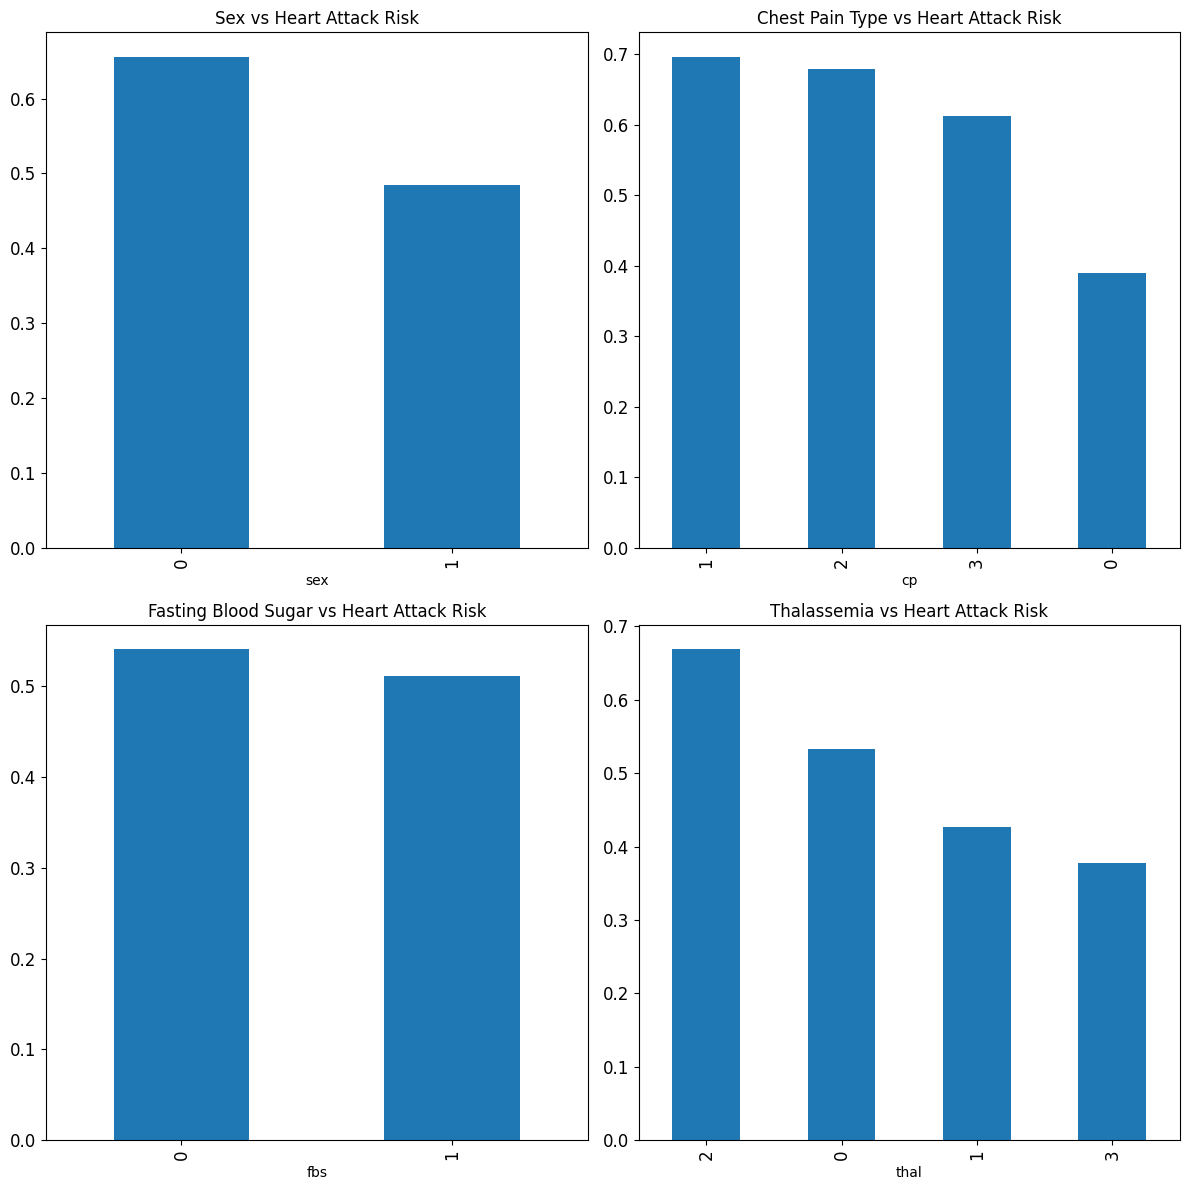

In [85]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))  

df.groupby('sex')['target'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0, 0], fontsize=12).set_title("Sex vs Heart Attack Risk")

df.groupby('cp')['target'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0, 1], fontsize=12).set_title("Chest Pain Type vs Heart Attack Risk")

df.groupby('fbs')['target'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1, 0], fontsize=12).set_title("Fasting Blood Sugar vs Heart Attack Risk")

df.groupby('thal')['target'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1, 1], fontsize=12).set_title("Thalassemia vs Heart Attack Risk")

plt.tight_layout()
plt.show()


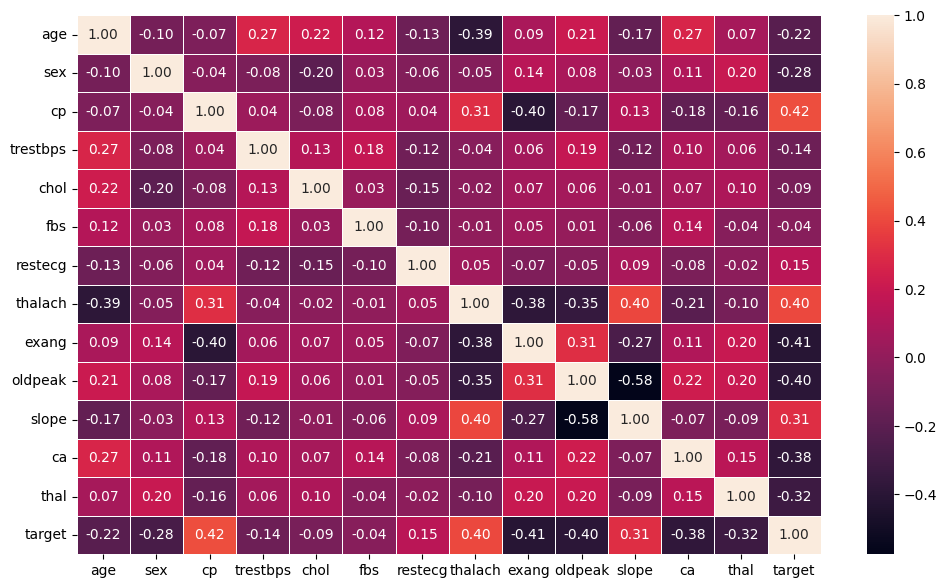

In [86]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)  
plt.show()


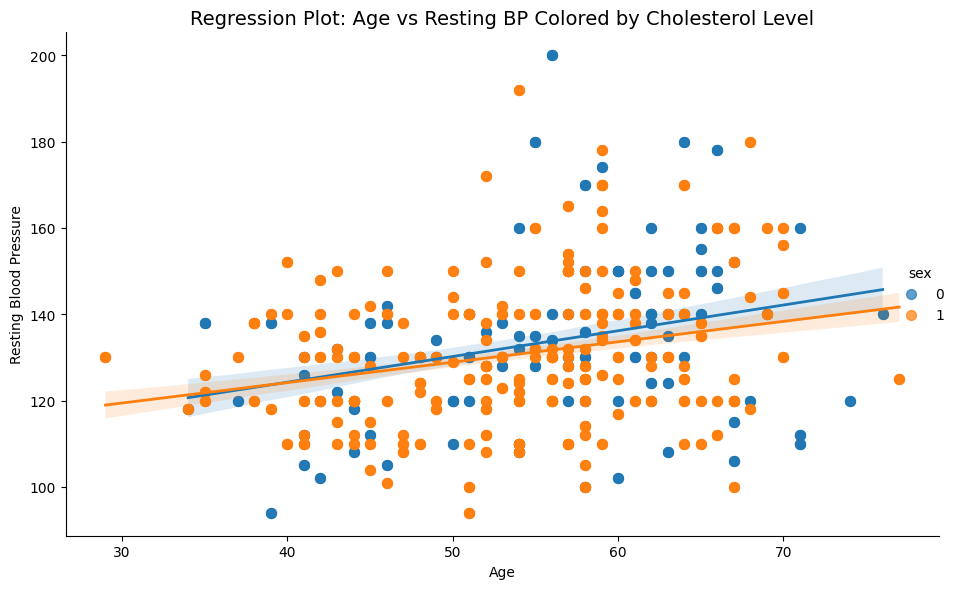

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 

sns.regplot(
    data=df,
    x="age",
    y="trestbps",
    hue="sex",
    height=6,
    aspect=1.5,
    scatter_kws={"s": 50, "alpha": 0.7},
    line_kws={"linewidth": 2}
)
 
plt.title("Regression Plot: Age vs Resting BP Colored by Cholesterol Level", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
 
X = df.drop(columns=["target"])
y = df["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, rf_pred)
 
# linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)

best_model = rf_model if rf_r2 > lr_r2 else lr_model
 
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl") 
print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Linear Regression R² Score: {lr_r2:.4f}")
print(f"Best Model Selected: {'Random Forest' if rf_r2 > lr_r2 else 'Linear Regression'}")

Random Forest R² Score: 0.8301
Linear Regression R² Score: 0.3254
Best Model Selected: Random Forest


In [89]:
import os
print(os.getcwd())


c:\Users\DEVARSHI MEHTA\OneDrive\Desktop\SEM-2\Projects\AIDAP
